In [2]:
import torch
from torch_geometric.nn import MessagePassing

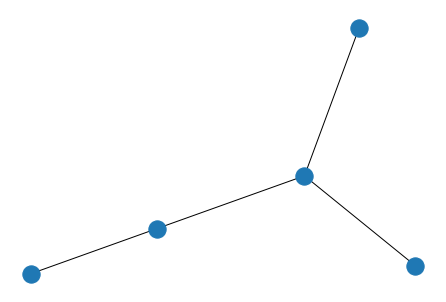

In [73]:
# Generate graph
import networkx as nx
from torch_geometric.data import Data
edge_index = torch.tensor([[0, 1, 2, 0, 3, 2, 4, 2],
                           [1, 0, 0, 2, 2, 3, 2, 4]], dtype=torch.long)
x = torch.tensor([[0, 2, 3], [9, 2, 3], [8, 2, 3], [7, 2, 3], [6, 2, 3]], dtype=torch.float32)
data = Data(x, edge_index)
graph = nx.Graph()
graph.add_edges_from(edge_index.transpose(0, 1).numpy())
nx.draw(graph)

In [101]:
from torch_geometric.nn import MessagePassing
from torch.nn import Linear, Parameter
import torch.nn.functional as F
from torch_geometric.utils import softmax

class GAT(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(GAT, self).__init__(aggr='add')
        
        self.in_channels = in_channels
        self.out_channels = out_channels

        self.a_left = Linear(in_channels, out_channels)
        self.a_right = Linear(in_channels, out_channels)
        self.lin = Linear(in_channels, out_channels)
        self.alpha = Parameter(torch.Tensor(1, 1, out_channels))


    def forward(self, edge_index, x):
        # 1. Calculate X transform
        x_left = x_right = self.lin(x).view(-1, 1, self.out_channels)
        a = x_left * self.alpha

        return self.propagate(edge_index, x=(x_left, x_right), a=(a, a))

    def message(self, x_j, x_i, index, a_i, a_j):
        # Generate new features
        # Calculate attention
        a = a_i + a_j

        a = F.leaky_relu(a, 0.2)
        a = softmax(a, index)

        return x_j * a#.unsqueeze(-1)


conv1 = GAT(3, 1)
conv1(edge_index, x)

tensor([[[2.2501]],

        [[2.6334]],

        [[2.3353]],

        [[2.2927]],

        [[2.2927]]], grad_fn=<ScatterAddBackward>)

In [68]:
n = 3
f = 10
ff = 5
a = torch.rand(n, 1).T
x = torch.rand(ff, f)
h = torch.rand(f, n)
print(x @ h)
print(x.dim())
print(a)

tensor([[2.1851, 2.0249, 1.8470],
        [2.4945, 1.4813, 2.1242],
        [2.9714, 2.8518, 2.6886],
        [2.6581, 2.8853, 3.2042],
        [2.4496, 2.0611, 2.8559]])
2
tensor([[0.0863, 0.5627, 0.2210]])
